In [ ]:
# Analysis

#There is a correlation with max temperature and latitude.  Temperature data resemble an inverse parabola, with peak at around 30 degrees latitude.
#Most of the sample size lies in the Northern Hemisphere (>0 degreees latitude).  The northern hemisphere is much more populated, which caused more samples to lie above 0 degress latitude.
#There doesn't seem to be a correlation between latitude and wind speed, humidity, and cloudiness based on the sample.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
import sys
import json

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

620

In [24]:
#retrieve random cities from OpenWeatherMap's list of cities, this list is used instead of citipy to ensure city id coherency with API call.
city_id_list="city.list.json"
data_read=pd.read_json(city_id_list)
sample=data_read.sample(n=600)
sample_df=sample[["coord","country","id","name"]]
sample_df.to_csv('random_samples.csv')

sample_df.head()

,coord,country,id,name
109753,"{'lon': 3.77801, 'lat': 50.629372}",BE,2803010,Ath
76857,"{'lon': 12.45, 'lat': 53.849998}",DE,6547911,Warnkenhagen
134301,"{'lon': 13.38555, 'lat': 51.299931}",DE,2861671,Nunchritz
15831,"{'lon': -6.3870000000000005, 'lat': 54.44709}",GB,3345440,Craigavon
70128,"{'lon': 7.63333, 'lat': 49.849998}",DE,6553530,Rehbach


## Perform API Calls

In [10]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

sample_cities=sample_df["id"]

city=[]
latitude=[]
temperature=[]
humidity=[]
cloudiness=[]
wind_speed=[]

for id in sample_cities:
    url = "http://api.openweathermap.org/data/2.5/weather?id=" + str(id) + "&units=Imperial&APPID="+ api_key
    response = requests.get(url).json()
    city.append(response['name'])
    latitude.append(response['coord']['lat'])
    temperature.append(response['main']['temp_max'])
    humidity.append(response['main']['humidity'])
    cloudiness.append(response['clouds']['all'])
    wind_speed.append(response['wind']['speed'])

master_df = pd.DataFrame({
    "City": city,
    "Latitude": latitude,
    "Temperature": temperature,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed
})

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 36.61, 'lon': -5.2},
 'dt': 1532476800,
 'id': 6359457,
 'main': {'humidity': 30,
  'pressure': 1012,
  'temp': 76.86,
  'temp_max': 84.2,
  'temp_min': 69.8},
 'name': 'Faraján',
 'sys': {'country': 'ES',
  'id': 5489,
  'message': 0.003,
  'sunrise': 1532496072,
  'sunset': 1532547181,
  'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
   'icon': '01n',
   'id': 800,
   'main': 'Clear'}],
 'wind': {'deg': 270, 'speed': 11.41}}

In [13]:
master_df.to_csv('city_data.csv')

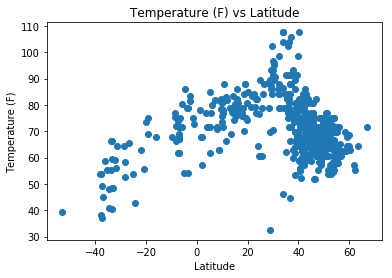

In [20]:
x_axis=master_df["Latitude"]
y_axis=master_df["Temperature"]
plt.scatter(x_axis, y_axis)
plt.title("Temperature (F) vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.show
plt.savefig('Temp vs Lat.png')

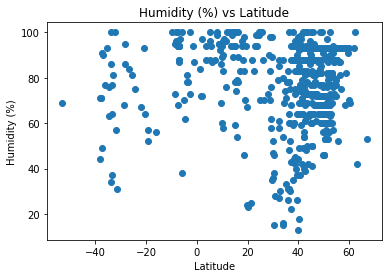

In [21]:
x_axis=master_df["Latitude"]
y_axis=master_df["Humidity"]
plt.scatter(x_axis, y_axis)
plt.title("Humidity (%) vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show
plt.savefig('Humidity vs Lat.png')

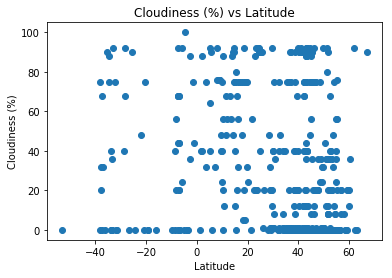

In [22]:
x_axis=master_df["Latitude"]
y_axis=master_df["Cloudiness"]
plt.scatter(x_axis, y_axis)
plt.title("Cloudiness (%) vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show
plt.savefig('Cloudiness vs Lat.png')

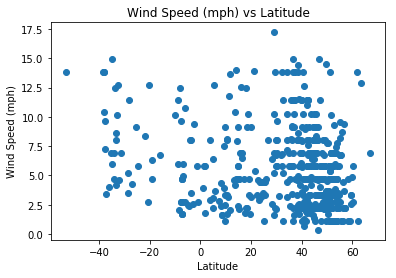

In [23]:
x_axis=master_df["Latitude"]
y_axis=master_df["Wind Speed"]
plt.scatter(x_axis, y_axis)
plt.title("Wind Speed (mph) vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show
plt.savefig('Wind Speed vs Lat.png')